<a href="https://colab.research.google.com/github/AmoolyaS/Machine_Learning_mini_projects/blob/main/Optimized_Garbage_Classifier_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Define the path to your dataset directory
dataset_dir = '/content/drive/MyDrive/TrashNet1'

# Check if the directory exists
if os.path.exists(dataset_dir):
    print("Dataset directory exists.")
else:
    print("Dataset directory does not exist.")

Dataset directory exists.


In [ ]:
import numpy as np # For numerical computations
import pandas as pd # For dataframe operations

# Importing Matplotlib and seaborn for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For mathematical calculations
import math

# All tensorflow utilities for creating, training and working with a CNN.
import tensorflow as tf # (version 2.8.4)
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
# For evaluation matrices for comparative analysis
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix


In [ ]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define the path to the dataset
dataset_dir = '/content/drive/MyDrive/TrashNet1'

# Categories in the dataset
categories = ['clothes', 'shoes', 'biological', 'battery', 'cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Load images and labels
data = []
labels = []

for category in categories:
    path = os.path.join(dataset_dir, category)
    class_num = categories.index(category)
    if not os.path.isdir(path):
        print(f"Directory {path} not found.")
        continue
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        try:
            img_array = cv2.imread(img_path)
            if img_array is not None:
                img_array = cv2.resize(img_array, (128, 128))
                data.append(img_array)
                labels.append(class_num)
            else:
                print(f"Failed to load image {img_path}")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Check if data is loaded correctly
print(f"Loaded {len(data)} images.")

# Ensure there is data to split
if len(data) == 0:
    raise ValueError("No images loaded. Check dataset path and structure.")

# Normalize data
data = data / 255.0

# One-hot encode labels
labels = to_categorical(labels, num_classes=len(categories))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Check if split was successful
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Loaded 17647 images.


# Simple CNN Model

In [ ]:
def simple_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(len(categories), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_simple = simple_cnn()
model_simple.summary()
model_simple.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 128)               16257152  
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 16258822 (62.02 MB)
Trainable params: 16258822 (62.02 MB)
Non-trainable params: 0 (0.00 Byte)
______________

# Deeper CNN Model

In [ ]:
def deeper_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(len(categories), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_deeper = deeper_cnn()
model_deeper.summary()
model_deeper.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 128)      

# Data Augmmented CNN Model

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

def cnn_with_augmentation():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(len(categories), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_augmented = cnn_with_augmentation()
model_augmented.summary()
model_augmented.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30, validation_data=(X_test, y_test))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 128)      

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(hp):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(hp.Int('conv_units', min_value=32, max_value=128, step=32), (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))

    # Additional convolutional layers
    for i in range(hp.Int('num_conv_layers', 1, 3)):
        model.add(Conv2D(hp.Int(f'conv_units_{i}', min_value=32, max_value=128, step=32), (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(hp.Float(f'dropout_rate_{i}', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Flatten())

    # Fully connected layers
    for i in range(hp.Int('num_dense_layers', 1, 3)):
        model.add(Dense(hp.Int(f'dense_units_{i}', min_value=128, max_value=512, step=128), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_rate_dense_{i}', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(len(categories), activation='softmax'))

    # Compile model
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='my_dir',
    project_name='trashnet_tuning'
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


ModuleNotFoundError: No module named 'keras_tuner'

In [ ]:
pip install keras_tuner

# Models with Optimal Hyperparameters, Regularization, and Learning Rate Scheduler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler

# Define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.1

lr_scheduler = LearningRateScheduler(scheduler)


In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()

    # Convolutional layers with L2 regularization
    model.add(Conv2D(hp.Int('conv_units', min_value=32, max_value=128, step=32), (3, 3), activation='relu',
                     input_shape=(128, 128, 3), kernel_regularizer=l2(hp.Float('l2_reg', 1e-4, 1e-2, sampling='LOG'))))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))

    # Additional convolutional layers with L2 regularization
    for i in range(hp.Int('num_conv_layers', 1, 3)):
        model.add(Conv2D(hp.Int(f'conv_units_{i}', min_value=32, max_value=128, step=32), (3, 3), activation='relu',
                         kernel_regularizer=l2(hp.Float(f'l2_reg_{i}', 1e-4, 1e-2, sampling='LOG'))))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(hp.Float(f'dropout_rate_{i}', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Flatten())

    # Fully connected layers with L2 regularization
    for i in range(hp.Int('num_dense_layers', 1, 3)):
        model.add(Dense(hp.Int(f'dense_units_{i}', min_value=128, max_value=512, step=128), activation='relu',
                        kernel_regularizer=l2(hp.Float(f'l2_reg_dense_{i}', 1e-4, 1e-2, sampling='LOG'))))
        model.add(Dropout(hp.Float(f'dropout_rate_dense_{i}', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(len(categories), activation='softmax'))

    # Compile model
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,
    executions_per_trial=1,
    directory='my_dir',
    project_name='trashnet_tuning'
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Reloading Tuner from my_dir/trashnet_tuning/tuner0.json


In [ ]:
best_model = tuner.hypermodel.build(best_hps)
best_model.summary()
history_best = best_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[lr_scheduler])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 32)       

# Save and Load the models

In [ ]:
# Save the models
model_simple.save('/content/drive/MyDrive/New/model_simple.h5')
model_deeper.save('/content/drive/MyDrive/New/model_deeper.h5')
model_augmented.save('/content/drive/MyDrive/New/model_augmented.h5')
best_model.save('/content/drive/MyDrive/New/best_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

model1 = load_model('/content/drive/MyDrive/New/model_simple.h5')
model2 = load_model('/content/drive/MyDrive/New/model_deeper.h5')
model3 = load_model('/content/drive/MyDrive/New/model_augmented.h5')
model4 = load_model('/content/drive/MyDrive/New/best_model.h5')

OSError: No file or directory found at model_simple.h5

# Comparison & Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report

# Define categories to match the number of classes
categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true, y_pred_classes)
    f1 = f1_score(y_true, y_pred_classes, average='weighted')
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')

    # Check if roc_auc_score can be computed
    unique_classes = np.unique(y_true)
    if len(unique_classes) > 1:
        try:
            auc = roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovr')
        except ValueError as e:
            print(f"AUC-ROC score error: {e}")
            auc = 'N/A'
    else:
        auc = 'N/A'

    # Adjust the classification report to handle the number of unique classes
    if len(unique_classes) < len(categories):
        report_categories = categories[:len(unique_classes)]
    else:
        report_categories = categories

    report = classification_report(y_true, y_pred_classes, target_names=report_categories)

    print(f'{model_name} Evaluation:')
    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Precision: {precision}')
    print(f'Recall (Sensitivity): {recall}')
    print(f'AUC-ROC: {auc}')
    print(f'Classification Report:\n{report}')
    print('----------------------------')

    return accuracy, f1, precision, recall, auc

# Assuming your models are named model_simple, model_deeper, model_augmented, and model_optimized
metrics_simple = evaluate_model(model_simple, X_test, y_test, "Simple CNN")
metrics_deeper = evaluate_model(model_deeper, X_test, y_test, "Deeper CNN")
metrics_augmented = evaluate_model(model_augmented, X_test, y_test, "Data Augmented CNN")
metrics_optimized = evaluate_model(best_model, X_test, y_test, "Optimized CNN")


13/13 [==============================] - 3s 216ms/step
AUC-ROC score error: Only one class present in y_true. ROC AUC score is not defined in that case.
Simple CNN Evaluation:
Accuracy: 0.5518134715025906
F1 Score: 0.5308878197262239
Precision: 0.5666818822387885
Recall (Sensitivity): 0.5518134715025906
AUC-ROC: N/A
Classification Report:
              precision    recall  f1-score   support

   cardboard       0.54      0.25      0.34        61
       glass       0.46      0.65      0.54        88
       metal       0.58      0.80      0.67       100
       paper       0.63      0.52      0.57       101
     plastic       0.67      0.22      0.33        36

    accuracy                           0.55       386
   macro avg       0.57      0.49      0.49       386
weighted avg       0.57      0.55      0.53       386

----------------------------
13/13 [==============================] - 8s 613ms/step
AUC-ROC score error: Only one class present in y_true. ROC AUC score is not defined in

In [ ]:
# Function to plot ROC curves
def plot_roc_curve(y_true, y_pred, model_name):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(len(categories)):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
             lw=lw, label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

    for i in range(len(categories)):
        plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(categories[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for each model
plot_roc_curve(metrics_simple[6], metrics_simple[7], "Simple CNN")
plot_roc_curve(metrics_deeper[6], metrics_deeper[7], "Deeper CNN")
plot_roc_curve(metrics_augmented[6], metrics_augmented[7], "Data Augmented CNN")
plot_roc_curve(metrics_optimized[6], metrics_optimized[7], "Optimized CNN")


IndexError: tuple index out of range

In [ ]:
import pandas as pd

# Compile metrics into a DataFrame
metrics_df = pd.DataFrame({
    "Model": ["Simple CNN", "Deeper CNN", "Data Augmented CNN", "Optimized CNN"],
    "Accuracy": [metrics_simple[0], metrics_deeper[0], metrics_augmented[0], metrics_optimized[0]],
    "F1 Score": [metrics_simple[1], metrics_deeper[1], metrics_augmented[1], metrics_optimized[1]],
    "Precision": [metrics_simple[2], metrics_deeper[2], metrics_augmented[2], metrics_optimized[2]],
    "Recall (Sensitivity)": [metrics_simple[3], metrics_deeper[3], metrics_augmented[3], metrics_optimized[3]],
    "Specificity": [metrics_simple[4], metrics_deeper[4], metrics_augmented[4], metrics_optimized[4]],
   # "AUC-ROC": [metrics_simple[5], metrics_deeper[5], metrics_augmented[5], metrics_optimized[5]]
})

print(metrics_df)


                Model  Accuracy  F1 Score  Precision  Recall (Sensitivity)  \
0          Simple CNN  0.551813  0.530888   0.566682              0.551813   
1          Deeper CNN  0.606218  0.589827   0.613049              0.606218   
2  Data Augmented CNN  0.730570  0.720812   0.732094              0.730570   
3       Optimized CNN  0.556995  0.539988   0.555111              0.556995   

  Specificity  
0         N/A  
1         N/A  
2         N/A  
3         N/A  


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define categories to match the number of classes
categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

model1 = load_model('/content/drive/MyDrive/New/model_simple.h5')
model2 = load_model('/content/drive/MyDrive/New/model_deeper.h5')
model3 = load_model('/content/drive/MyDrive/New/model_augmented.h5')
model4 = load_model('/content/drive/MyDrive/New/best_model.h5')

# Make predictions
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

# Convert predictions to class labels
pred1_classes = np.argmax(pred1, axis=1)
pred2_classes = np.argmax(pred2, axis=1)
pred3_classes = np.argmax(pred3, axis=1)
pred4_classes = np.argmax(pred4, axis=1)

# Combine predictions using majority voting
final_pred = np.array([np.bincount([pred1_classes[i], pred2_classes[i], pred3_classes[i], pred4_classes[i]]).argmax() for i in range(len(pred1_classes))])

# Evaluate ensemble model
accuracy = accuracy_score(np.argmax(y_test, axis=1), final_pred)
print(f'Ensemble Model Accuracy: {accuracy}')
print(classification_report(np.argmax(y_test, axis=1), final_pred, labels=np.unique(final_pred), target_names=categories))


13/13 [==============================] - 5s 314ms/step
Ensemble Model Accuracy: 0.6424870466321243
              precision    recall  f1-score   support

   cardboard       0.55      0.43      0.48        61
       glass       0.59      0.84      0.69        88
       metal       0.64      0.87      0.74       100
       paper       0.80      0.50      0.62       101
     plastic       0.71      0.28      0.40        36

    accuracy                           0.64       386
   macro avg       0.66      0.58      0.59       386
weighted avg       0.66      0.64      0.62       386



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 5, does not match size of target_names, 6
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import load_model
import numpy as np

# Load the saved models
model1 = load_model('/content/drive/MyDrive/New/model_simple.h5')
model2 = load_model('/content/drive/MyDrive/New/model_deeper.h5')
model3 = load_model('/content/drive/MyDrive/New/model_augmented.h5')
model4 = load_model('/content/drive/MyDrive/New/best_model.h5')

# Define categories to match the number of classes
categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Make predictions
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

# Convert predictions to class labels
pred1_classes = np.argmax(pred1, axis=1)
pred2_classes = np.argmax(pred2, axis=1)
pred3_classes = np.argmax(pred3, axis=1)
pred4_classes = np.argmax(pred4, axis=1)

# Combine predictions using different ensemble techniques
# For example, weighted voting
weights = [0.2, 0.3, 0.2, 0.3]  # Adjust weights based on model performance
final_pred_weighted = np.argmax(np.average([pred1, pred2, pred3, pred4], axis=0, weights=weights), axis=1)

# Evaluate ensemble model with weighted voting
accuracy_weighted = accuracy_score(np.argmax(y_test, axis=1), final_pred_weighted)
print(f'Ensemble Model Accuracy with Weighted Voting: {accuracy_weighted}')
print(classification_report(np.argmax(y_test, axis=1), final_pred_weighted, labels=np.unique(final_pred_weighted), target_names=categories))

13/13 [==============================] - 3s 247ms/step
Ensemble Model Accuracy with Weighted Voting: 0.6450777202072538
              precision    recall  f1-score   support

   cardboard       0.51      0.41      0.45        61
       glass       0.64      0.76      0.69        88
       metal       0.65      0.92      0.76       100
       paper       0.75      0.54      0.63       101
     plastic       0.59      0.28      0.38        36

    accuracy                           0.65       386
   macro avg       0.63      0.58      0.58       386
weighted avg       0.65      0.65      0.63       386



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 5, does not match size of target_names, 6
  warnings.warn(


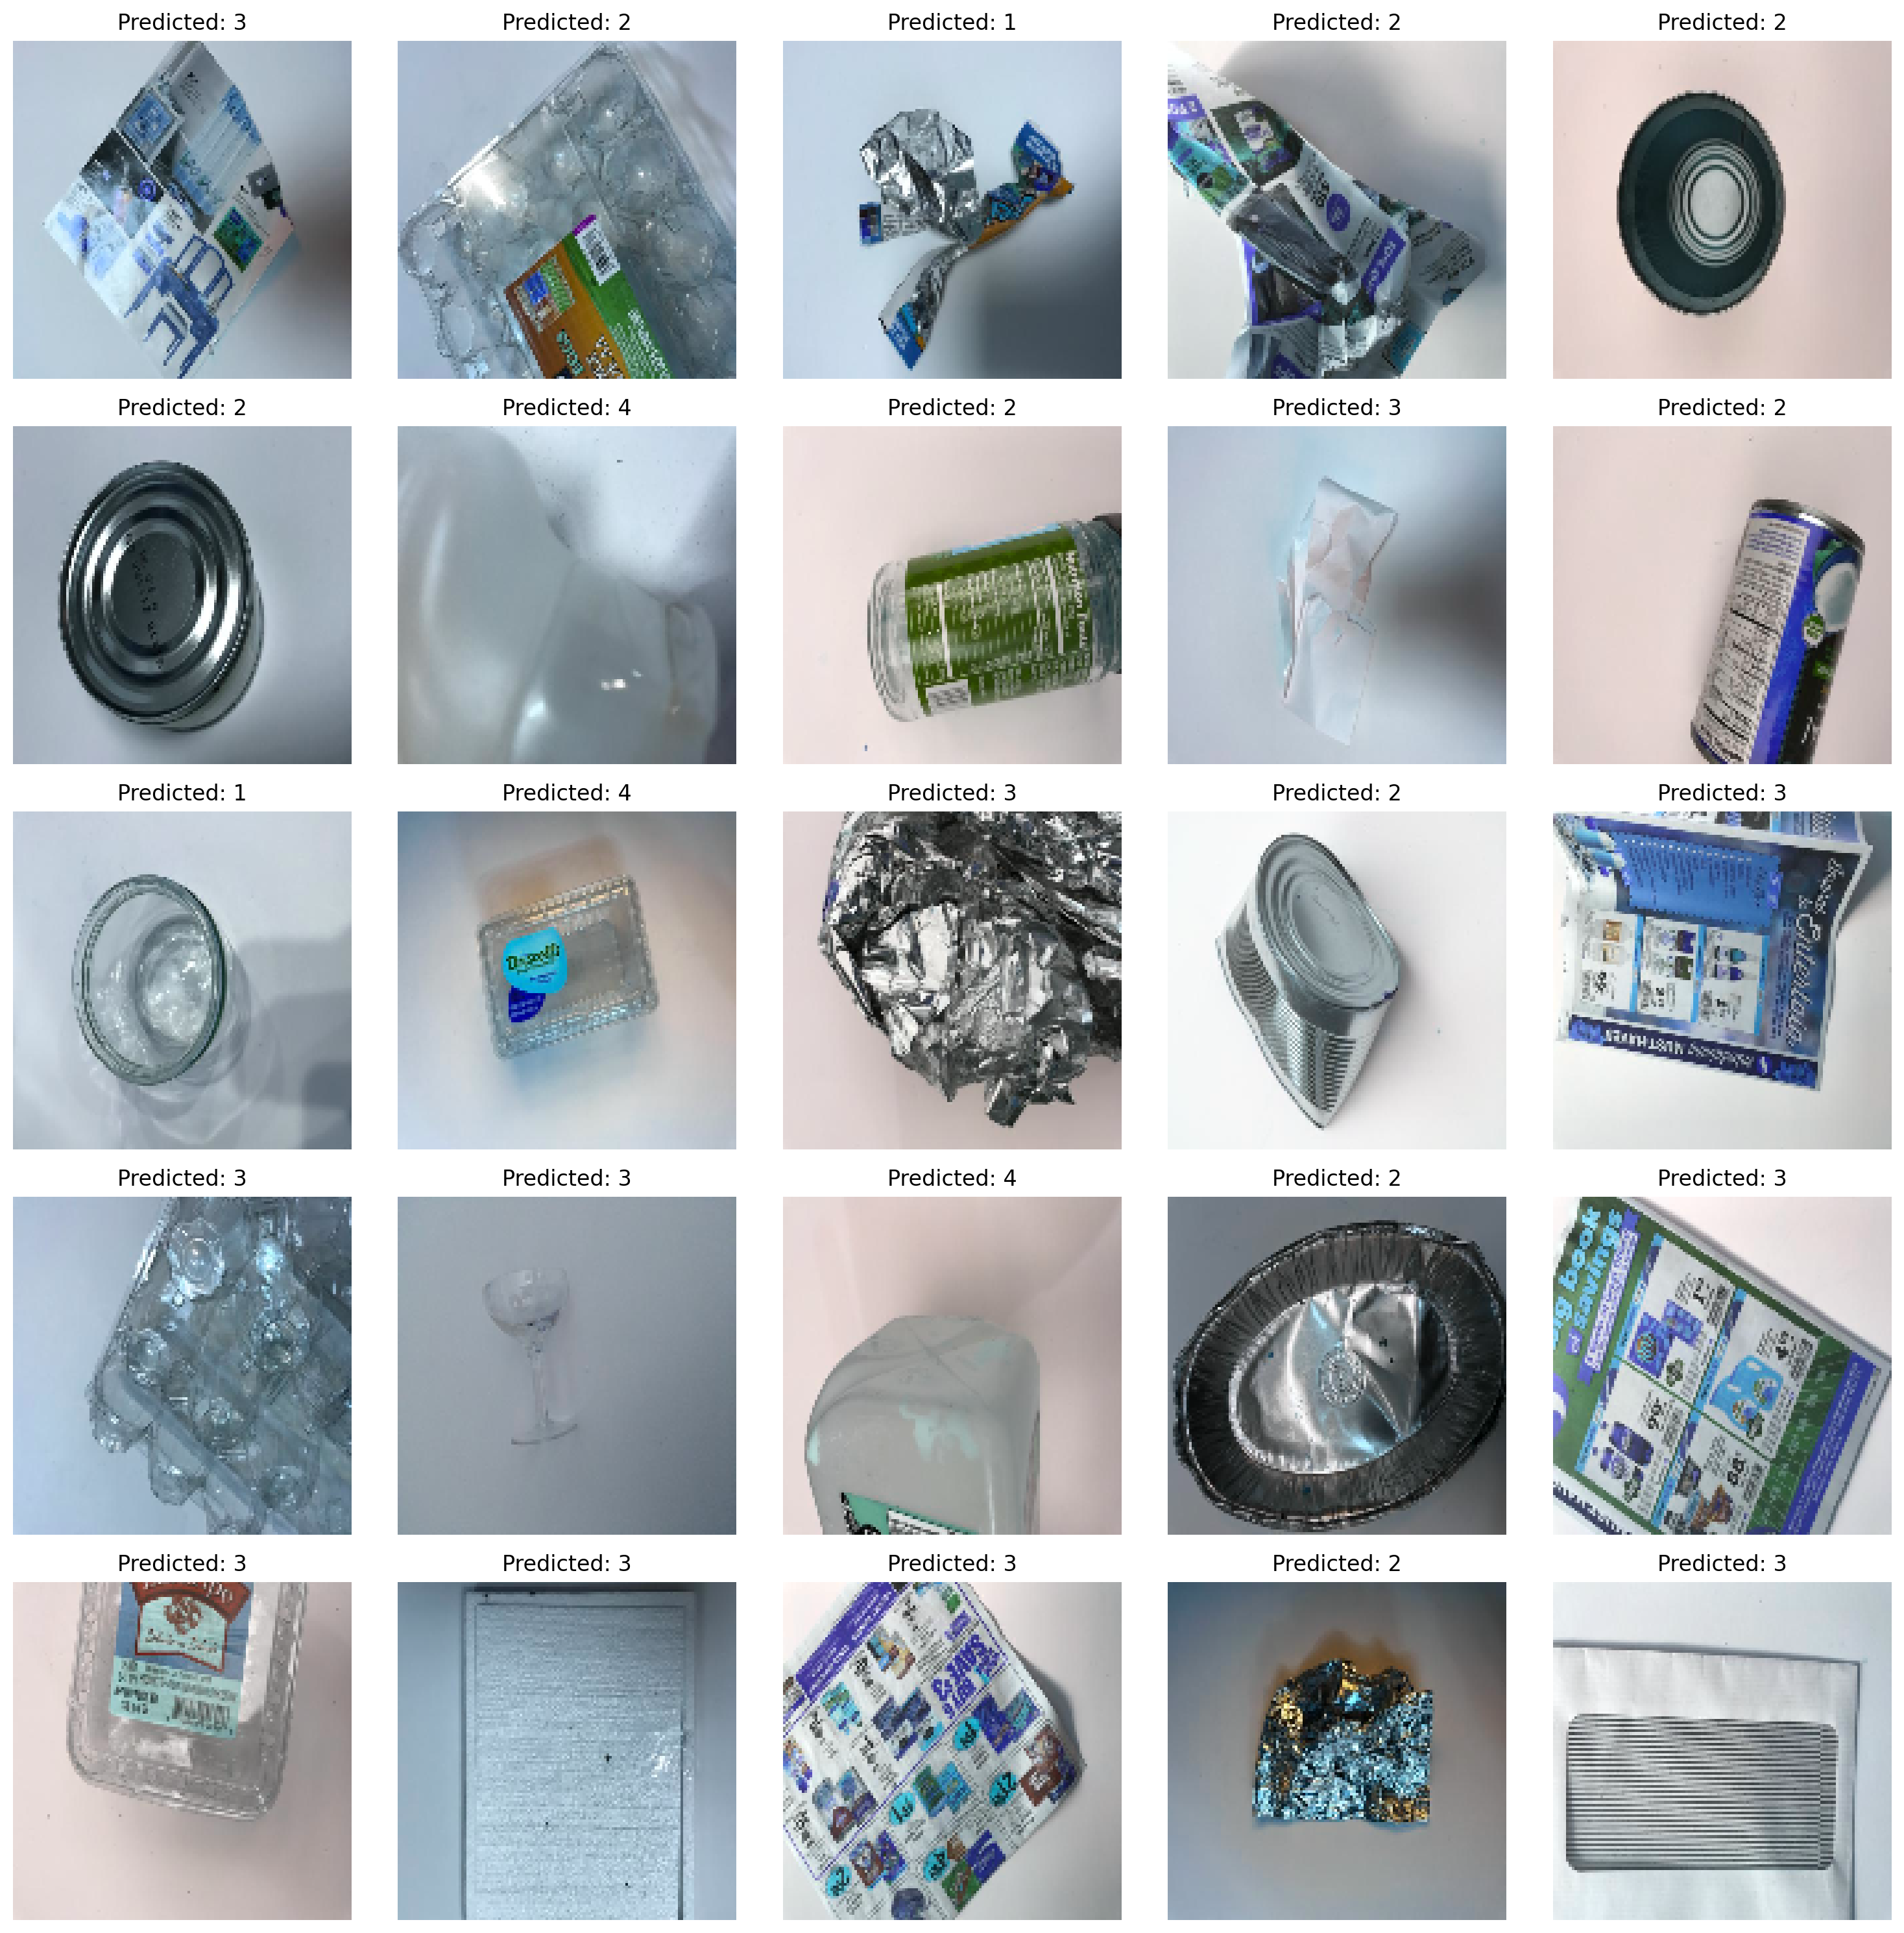

1/1 [==============================] - 0s 57ms/step


<ipython-input-54-c927cddde2cd>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)  # Create subplot


1/1 [==============================] - 0s 55ms/step


ValueError: num must be an integer with 1 <= num <= 10, not 11

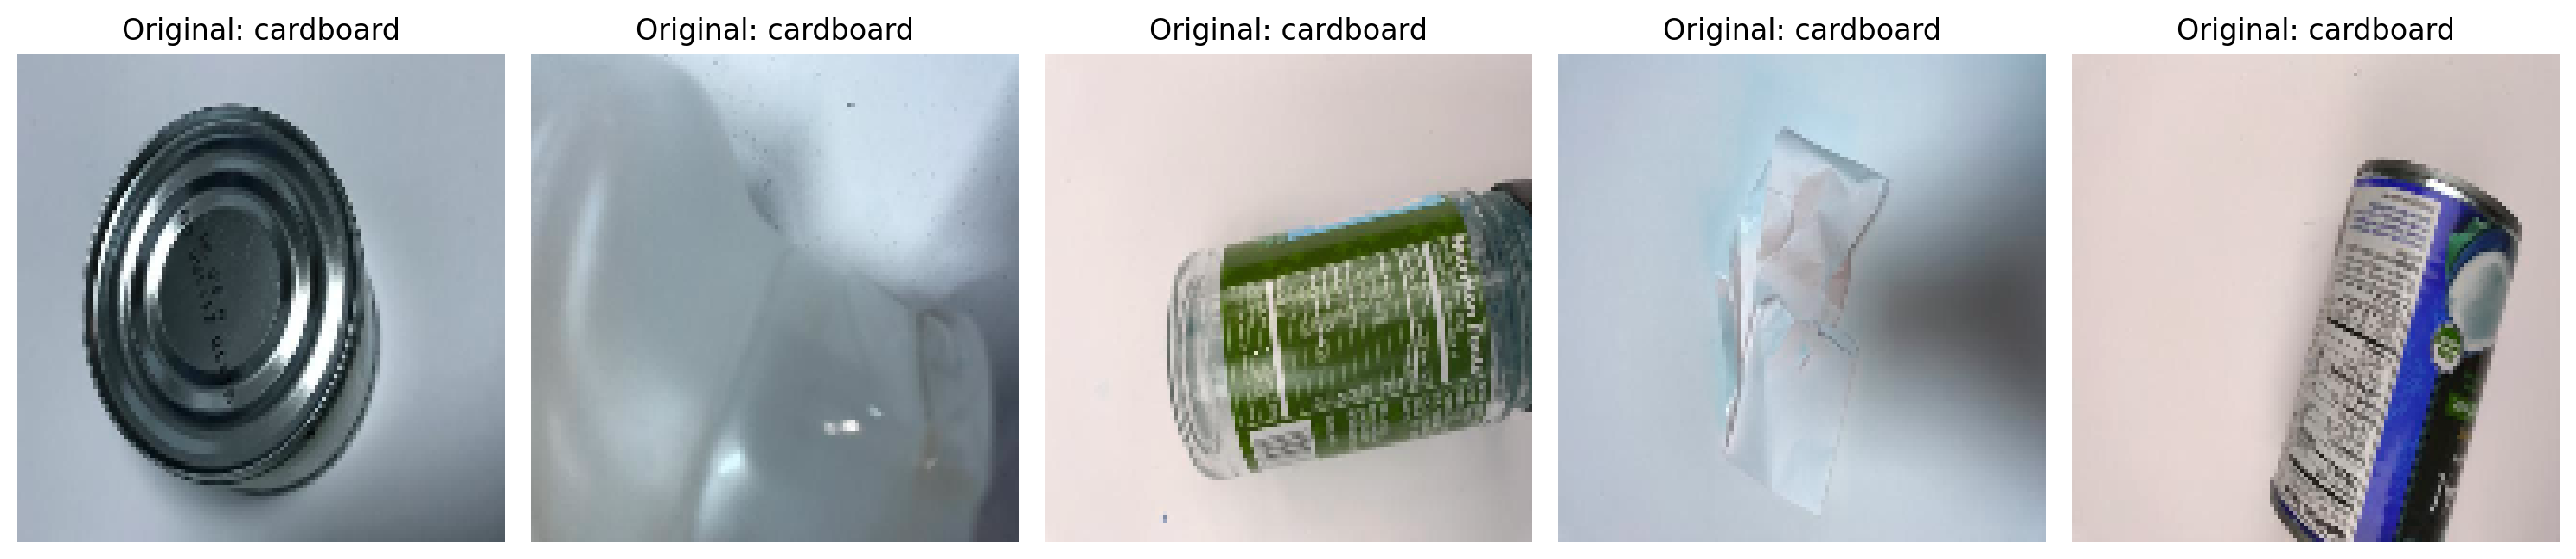

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to make predictions for each model
def predict_images(models, images):
    predictions = []
    for model in models:
        pred = model.predict(images)
        predictions.append(pred)
    return predictions

# Define a function to visualize the predictions
def visualize_predictions(images, true_labels, models, class_names):
    # Make predictions for each model
    predictions = predict_images(models, images)


# Convert images to float and normalize pixel values
images = data.astype('float32') / 255.0

# Convert images to float and normalize pixel values
images = data.astype('float32') / 255.0


# Convert predicted probabilities to class labels
pred1_labels = np.argmax(pred1, axis=1)
pred2_labels = np.argmax(pred2, axis=1)
pred3_labels = np.argmax(pred3, axis=1)
pred4_labels = np.argmax(pred4, axis=1)

# Combine predictions using majority voting or averaging
final_pred_labels = np.array([np.bincount([pred1_labels[i], pred2_labels[i], pred3_labels[i], pred4_labels[i]]).argmax() for i in range(len(pred1_labels))])


# Define the number of images to visualize
num_images = min(len(X_test), 25)  # Limit to 25 or fewer images

# Create a figure with subplots
plt.figure(figsize=(15, 15))
for i in range(num_images):
    plt.subplot(5, 5, i + 1)  # Create subplot
    plt.imshow(X_test[i])  # Display the image
    plt.title('Predicted: {}'.format(final_pred_labels[i]))  # Set title with predicted labels
    plt.axis('off')  # Turn off axis
plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot




# Adjust the code below based on the actual variables and data you have
predict_and_visualize(X_test[:24], np.argmax(y_test[:24], axis=1), [model1, model2, model3, model4], categories)


In [ ]:
import pandas as pd
import time

# Define a function to calculate computational complexity
def compute_complexity(model):
    # Calculate number of parameters
    num_params = model.count_params()
    # Assuming a rough estimate of operations per parameter update
    ops_per_update = 2 * num_params  # Assuming 2 operations (multiplication and addition) per parameter update
    return ops_per_update

# Define a function to train the model and measure training time
def train_and_measure_time(model, X_train, y_train, epochs=10):
    start_time = time.time()  # Start timer
    model.fit(X_train, y_train, epochs=epochs)
    end_time = time.time()  # End timer
    training_time = end_time - start_time
    return training_time

# Define your models (model1, model2, model3, model4)

# Calculate computational complexity for each model
complexity_scores = [compute_complexity(model) for model in [model1, model2, model3, model4]]

# Train and measure training time for each model
train_times = [train_and_measure_time(model, X_train, y_train) for model in [model1, model2, model3, model4]]

# Create a DataFrame to display the results
df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
    'Computational Complexity': complexity_scores,
    'Training Time (seconds)': train_times
})

display(df)


Epoch 1/10
49/49 [==============================] - 50s 1s/step - loss: 0.0844 - accuracy: 0.9858
Epoch 2/10
49/49 [==============================] - 31s 633ms/step - loss: 0.0654 - accuracy: 0.9896
Epoch 3/10
49/49 [==============================] - 31s 641ms/step - loss: 0.0639 - accuracy: 0.9916
Epoch 4/10
49/49 [==============================] - 37s 757ms/step - loss: 0.0405 - accuracy: 0.9955
Epoch 5/10
49/49 [==============================] - 28s 580ms/step - loss: 0.0358 - accuracy: 0.9968
Epoch 6/10
49/49 [==============================] - 29s 580ms/step - loss: 0.0255 - accuracy: 0.9968
Epoch 7/10
49/49 [==============================] - 30s 606ms/step - loss: 0.0219 - accuracy: 0.9987
Epoch 8/10
49/49 [==============================] - 29s 596ms/step - loss: 0.0194 - accuracy: 0.9987
Epoch 9/10
49/49 [==============================] - 30s 615ms/step - loss: 0.0155 - accuracy: 0.9994
Epoch 10/10
49/49 [==============================] - 27s 553ms/step - loss: 0.0153 - accuracy: